In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

There's some `order` data in this directory.  Find it, and read it into a dataframe.

In [3]:
orders = pd.read_csv("data/orders.csv", index_col=0)
orders = orders.reset_index(drop=True)
orders.head()


,product_id,state,date,rating,units_sold,price
0,5,ID,2010-02-05,*,6.0,$4.73
1,4,FL,2010-02-07,****,7.0,NaN
2,1,NY,2010-02-07,*,NaN,$23.81
3,7,HI,2010-03-12,*,4.0,$21.78
4,5,NY,2010-04-07,****,6.0,$4.73


<IPython.core.display.Javascript object>

Inspect the data frame with the `.info()` method.  Where do we have nans?

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product_id  213 non-null    int64  
 1   state       213 non-null    object 
 2   date        213 non-null    object 
 3   rating      187 non-null    object 
 4   units_sold  187 non-null    float64
 5   price       185 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 10.1+ KB


<IPython.core.display.Javascript object>

Further inspect the data frame with `.isna()` or `.isnull()`

What percentage of each column is `NaN`?

In [5]:
print(orders.isna().sum())
print(orders.isna().mean())

product_id     0
state          0
date           0
rating        26
units_sold    26
price         28
dtype: int64
product_id    0.000000
state         0.000000
date          0.000000
rating        0.122066
units_sold    0.122066
price         0.131455
dtype: float64


<IPython.core.display.Javascript object>

Convert the price column to numeric

In [6]:
orders["price"] = orders["price"].str.replace("$", "")
orders["price"] = pd.to_numeric(orders["price"], errors="coerce")

<IPython.core.display.Javascript object>

Using `pd.to_numeric` with the option `errors="coerce"` can create new `NaN`s. 

Redo the same missing value analysis.

Convert the ratings column to numeric.

In [7]:
orders.head()

,product_id,state,date,rating,units_sold,price
0,5,ID,2010-02-05,*,6.0,4.73
1,4,FL,2010-02-07,****,7.0,NaN
2,1,NY,2010-02-07,*,NaN,23.81
3,7,HI,2010-03-12,*,4.0,21.78
4,5,NY,2010-04-07,****,6.0,4.73


<IPython.core.display.Javascript object>

In [8]:
# for rating in orders["rating"]:
#     orders["rating"] = len(rating)

# orders["rating"] = orders["rating"].str.strip().str.len()
ratings_map = {"*": 1, "**": 2, "***": 3, "****": 4, "*****": 5}
orders["rating"] = orders["rating"].replace(ratings_map)

<IPython.core.display.Javascript object>

Convert the date column to a date datatype and sort by it

In [9]:
orders["date"] = pd.to_datetime(orders["date"])

<IPython.core.display.Javascript object>

In [10]:
orders["date"].dt.month_name()

0      February
1      February
2      February
3         March
4         April
         ...   
208    November
209    November
210    November
211    December
212    December
Name: date, Length: 213, dtype: object

<IPython.core.display.Javascript object>

Now let's address the missing values.

In practice, the 2 main ways we might handle NAs are:

* Drop them
* Fill them in with a value
  * Some people didn't mark their height on a survey, maybe we fill in with the average height reported
  * The thermeter broke so we're missing a temperature at time 4, maybe we fill it in with the average of time 3 and time 5 (linear interpolation)


Before dropping we'd like to know why the values are NA because we might be dropping valid data.  For example, you might have seen something like below on a survey:

> 10. Are you a veteran?:  &emsp;&emsp; Yes [&emsp;]&emsp;&emsp;No [&emsp;]
> 
> (only answer the following questions if you answered yes to question 10)

In this case, we should expect non-veterans to have missing values to the veteran only questions.  Other times, missing values aren't that deep and they're just missing.  For example, maybe a survey taker didn't know there was a page 2 so they left it all blank.

In practice it's very important to know how the data was collected and what a missing value indicates.

* Is there any pattern to any of the missingness?

In [11]:
# not missing at random, missing only for product 0
pd.crosstab(orders["rating"].isna(), orders["product_id"])

product_id,0,1,2,3,4,5,6,7,8,9
rating,,,,,,,,,,
False,0,19,22,20,18,17,26,21,24,20
True,26,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

We want to move forward with a dataframe that doesn't have any missing values.

* What options do we have?
* Which ones make sense for each column?
    * How do we decide which ones make sense?
    
Once these questions are answered.  Let's apply them until we have no missing values.

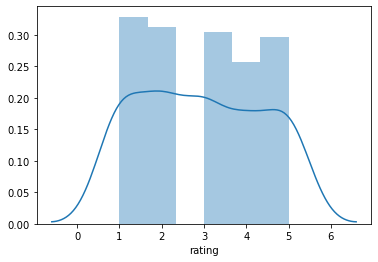

<IPython.core.display.Javascript object>

In [12]:
sns.distplot(orders.rating)

In [13]:
orders = orders.dropna(subset=["rating"])
orders.isna().sum()

product_id     0
state          0
date           0
rating         0
units_sold    21
price         25
dtype: int64

<IPython.core.display.Javascript object>

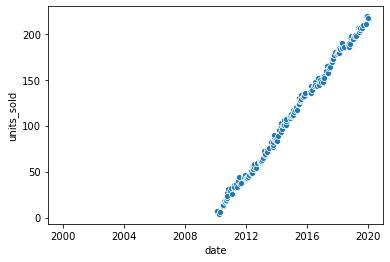

<IPython.core.display.Javascript object>

In [14]:
sns.scatterplot("date", "units_sold", data=orders)

In [16]:
orders = orders.sort_values("date")
orders["units_sold"] = orders["units_sold"].interpolate()
orders.isna().mean()

product_id    0.00000
state         0.00000
date          0.00000
rating        0.00000
units_sold    0.00000
price         0.13369
dtype: float64

<IPython.core.display.Javascript object>